# Regresi Non Linier
---

kasus pada data penjualan kayu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datakayu.csv")
df.head(10)

,item,pesan,bahan
0,1,50,5
1,1,77,16
2,2,37,20
3,1,12,12
4,1,1,1
5,2,1,1
6,3,1,1
7,2,1,1
8,2,1,1
9,2,2,1


### Memplot dataset
---
Berikut adalah apa yang terlihat seperti titik-titik data. Hasil plotting terlihat seperti fungsi logistik atau eksponensial. Pertumbuhannya mulai lambat, kemudian dari tahun 2005 ke depan, pertumbuhannya sangat signifikan. Dan akhirnya, sedikit melambat di tahun 2010-an.

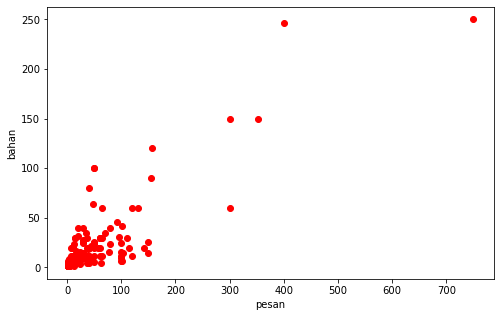

In [9]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["pesan"].values, df["bahan"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('bahan')
plt.xlabel('pesan')
plt.show()

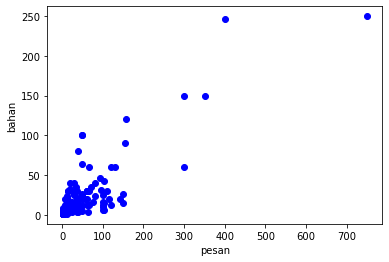

In [10]:
plt.scatter(df["pesan"].values, df["bahan"].values,  color='blue')
plt.xlabel("pesan")
plt.ylabel("bahan")
plt.show()

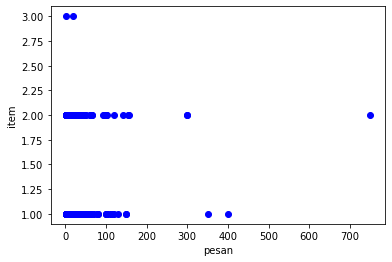

In [11]:
plt.scatter(df["pesan"].values, df["item"].values,  color='blue')
plt.xlabel("pesan")
plt.ylabel("item")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df["pesan"].values)
train_y = np.asanyarray(df["bahan"].values)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

ValueError: Expected 2D array, got 1D array instead:
array=[ 50  77  37  12   1   1   1   1   1   2   3  12   6  65   2   1   1  38
   1  10  12  10  30   1 142   6  60  10  18 100   1  21 120  40  22   1
 100 102  12  20 100   1  20 100   1 156  46   1  63  20 103   1   8   2
   1   3   3  60  48   1   1   3   7   2  30  26  62   9  23 155 750   8
   1  30  40  15  24  24  24  12   1  96  17   2  12   2  24  24  50 150
  15   2   4   3  40   1   2  10   5   5  12  30  12   6  40  20 120  15
  15  60   2   2  50  70  15  24   1  80  24  80   1  10  12  14  18   1
  36   3  22  10  12  15   5  50   1   3  10   1   1 400  14 150 352  92
  35   1  14  10   4   2   1  50  50   2   1   2   1 110 130  36   2  20
  40  30  40  11  16  40  35   3  10   4   1  24 100   2  12  15  12  12
  11  30   6  38  10  12 102  30  30   6 300   5   3   6   2  28  24  65
 115  65  36   1  50   6  25   1   2   2   1  60  40  40   1   6  30   1
  50  12  12   1   5   1  60  50  30   1   2   2 300  30  24  24  57  44
   1  12   2  12  24  30  25  24].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Pemilihan Model 
---

Dari tampilan awal plot, kita dapat menentukan bahwa fungsi logistik bisa menjadi pendekatan yang baik,
karena memiliki sifat mulai dengan pertumbuhan lambat, pertumbuhan meningkat di tengah, dan kemudian menurun lagi di akhir; seperti diilustrasikan di bawah ini:

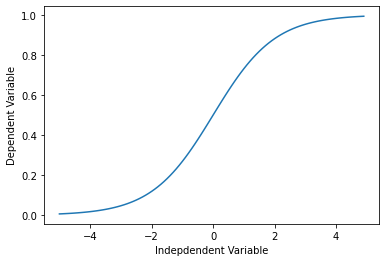

In [3]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


Rumus untuk fungsi logistik adalah sebagai berikut:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Mengontrol kecuraman kurva,

$\beta_2$: Menggeser kurva pada sumbu x.

### Pembuatan Model 
---
Model regresi dan inisialisasi parameternya dapat dibuat.

In [4]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Contoh garis sigmoid yang mungkin cocok dengan data dapat dilihat:

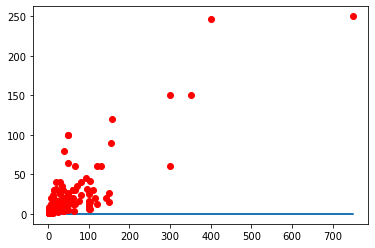

In [5]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Tugas yang harus dilakukan adalah menemukan parameter terbaik untuk model. Normalisasi x dan y diperlukan:

In [6]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Bagaimana menemukan parameter terbaik untuk pencocokan kurva?


__curve_fit__ yang menggunakan least square non-linear agar sesuai dengan fungsi sigmoid, terhadap data dapat digunakan. Nilai optimal untuk parameter sehingga jumlah residu kuadrat dari sigmoid(xdata, *popt) - ydata diminimalkan.

popt adalah parameter yang dioptimalkan.

In [7]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 8.579601, beta_2 = 0.381648


Hasil model regressi dapat diplot:

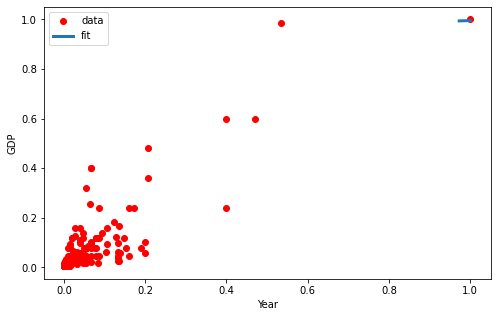

In [8]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()